In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as clt
import ptitprince as pt

sns.set(style='whitegrid', font_scale=2)

#df = pd.read_pickle('/home/mwisdom/Documents/data/analysed_data/one_second_centre_port_hold/SNL_photo36/AllSessionsDataframe/SNL_photo36_all_sessions.pkl')

#SessionDates = df['SessionDate'].unique()



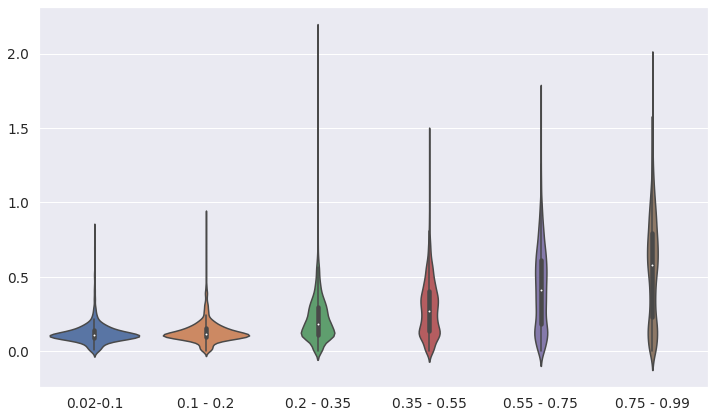

In [19]:
animalIDs = ['CPH07', 'CPH08', 'CPH09', 'CPH10', 'CPH11', 'CPH12']

df_to_concat = []

for animalID in animalIDs:
    df = pd.read_pickle('/home/mwisdom/Documents/data/analysed_data/one_second_centre_port_hold/' + animalID + '/AllSessionsDataframe/' + animalID + '_all_sessions.pkl')

    #SessionDates = df['SessionDate'].unique()

    Cue_Delay_bin_filts = {'0.02-0.1': (df['CueDelay'] > 0.02) & (df['CueDelay'] < 0.1) & (df['TrainingLevel'] == 3),
    '0.1 - 0.2': (df['CueDelay'] > 0.1) & (df['CueDelay'] < 0.2) & (df['TrainingLevel'] == 3),
    '0.2 - 0.35': (df['CueDelay'] > 0.2) & (df['CueDelay'] < 0.35) & (df['TrainingLevel'] == 3),
    '0.35 - 0.55': (df['CueDelay'] > 0.35) & (df['CueDelay'] < 0.55) & (df['TrainingLevel'] == 3),
    '0.55 - 0.75': (df['CueDelay'] > 0.55) & (df['CueDelay'] < 0.75) & (df['TrainingLevel'] == 3),
    '0.75 - 0.99': (df['CueDelay'] > 0.75) & (df['CueDelay'] < 0.99) & (df['TrainingLevel'] == 3)}

    CentrePortHoldTimes_by_CueDelay = {}

    for k, v in Cue_Delay_bin_filts.items():
        CueDelay_filtered_df = df.loc[v]
        array_CentrePortHoldTimes = np.hstack(CueDelay_filtered_df['CentrePortHoldTimes'])
        CentrePortHoldTimes_by_CueDelay[k] = array_CentrePortHoldTimes

    df_CentrePortHoldTimes_by_CueDelay = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in CentrePortHoldTimes_by_CueDelay.items() ]))
    df_to_concat.append(df_CentrePortHoldTimes_by_CueDelay)

df_all_CPHT_by_CueDelay = pd.concat(df_to_concat, ignore_index=True)
df = df_all_CPHT_by_CueDelay

f, ax = plt.subplots(figsize= (12, 7))
ax = sns.violinplot( data = df_all_CPHT_by_CueDelay)

In [13]:
animalIDs = ['CPH07', 'CPH08', 'CPH09', 'CPH10', 'CPH11', 'CPH12'] #'SNL_photo36'

df_to_concat = []

for animalID in animalIDs:
    df = pd.read_pickle('/home/mwisdom/Documents/data/analysed_data/one_second_centre_port_hold/' + animalID + '/AllSessionsDataframe/' + animalID + '_all_sessions.pkl')

    post_1s_TrialNum_bins = {'0-74': [0, 74], '75-149': [75, 149], '150-224': [150, 224], '225-299': [225, 299], '300-374': [300, 374]}
    
    #{'0-49': [0, 49], '50-99': [50, 99], '100-149': [100, 149], '150-199': [150, 199], '200-249': [200, 249], '250-299': [250, 299], '300-349': [300, 349]}

    '''{'0-99': [0, 99],
    '100-199': [100, 199],
    '200-299': [200, 299],
    '300-399': [300, 399],
    '400-499': [400, 499],
    '500-599': [500, 599],
    '600-699': [600, 699]}'''

    post_1s_CentrePortHoldTimes = {}

    for k, v in post_1s_TrialNum_bins.items():
        filt = (df['CueDelay'] == 1) & (df['TrainingLevel'] == 3)
        filtered_df = df.loc[filt]
        filtered_df = filtered_df.reset_index(drop=True)
        array_CentrePortHoldTimes = np.hstack(filtered_df.loc[v[0]:v[1], 'CentrePortHoldTimes'])
        array_CentrePortHoldTimes = np.delete(array_CentrePortHoldTimes, np.where(array_CentrePortHoldTimes < 0))
        post_1s_CentrePortHoldTimes[k] = array_CentrePortHoldTimes

    df_post_1s_CentrePortHoldTimes = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in post_1s_CentrePortHoldTimes.items()]))
    df_to_concat.append(df_post_1s_CentrePortHoldTimes)

df_all_post1s_CPHT_TrialBinned = pd.concat(df_to_concat, ignore_index=True)

df = df_all_post1s_CPHT_TrialBinned

Text(0.5, 1.0, 'Figure P1\n Bar Plot')

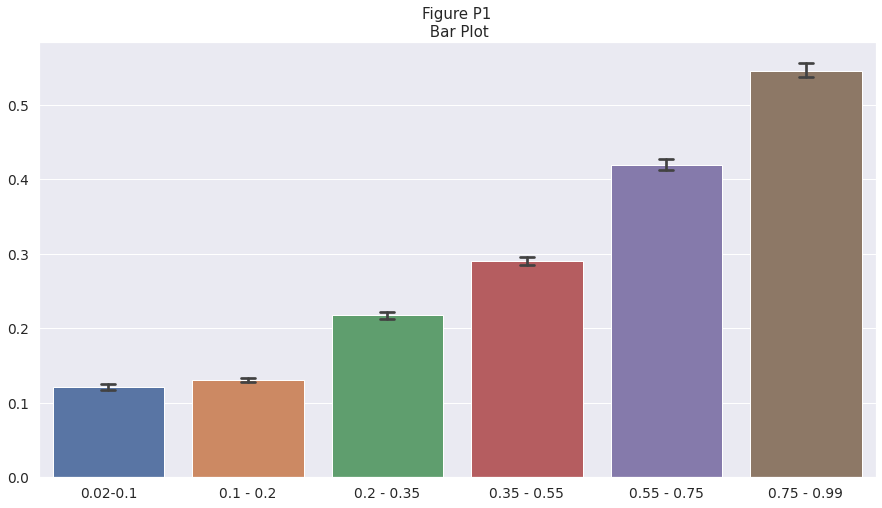

In [20]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(data = df, capsize= .1)
plt.title("Figure P1\n Bar Plot")

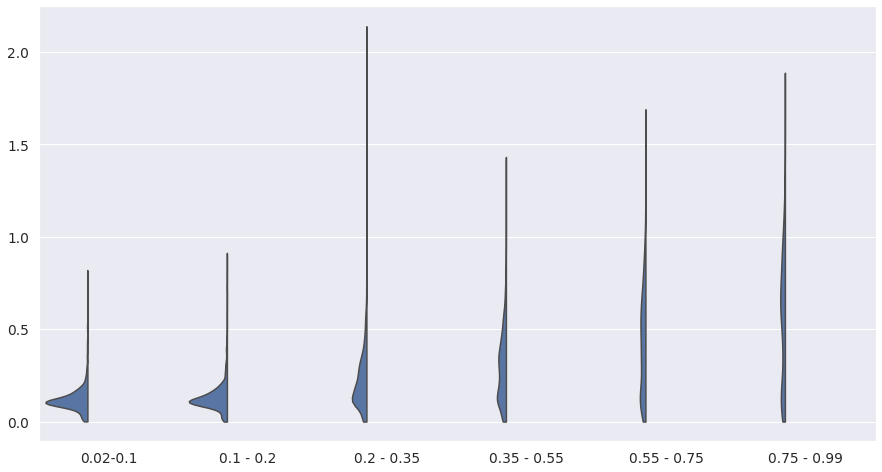

In [21]:
f, ax = plt.subplots(figsize=(15, 8)); ort="h"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = 'v')

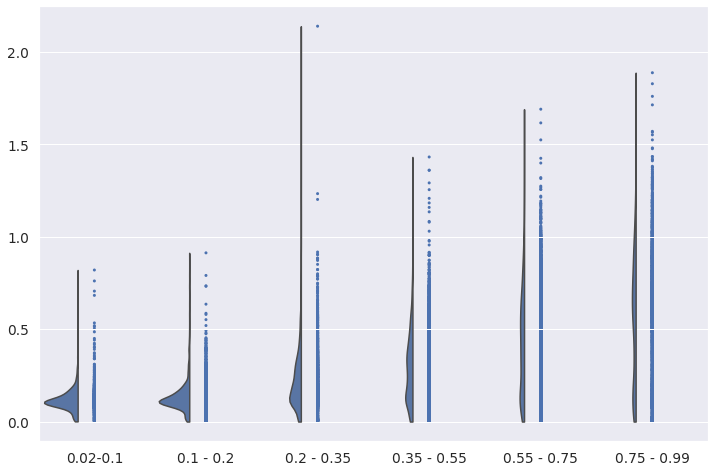

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
ax=pt.half_violinplot( data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = 'v')
ax=sns.stripplot( data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 0, zorder = 0, orient = 'v')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mwisdom/Documents/data_analysis/analysed_data/One_Second_Hold/figures/rainplot_CueDelay_vs_CentrePortHold_SNL_photo36_38_39_40.png'

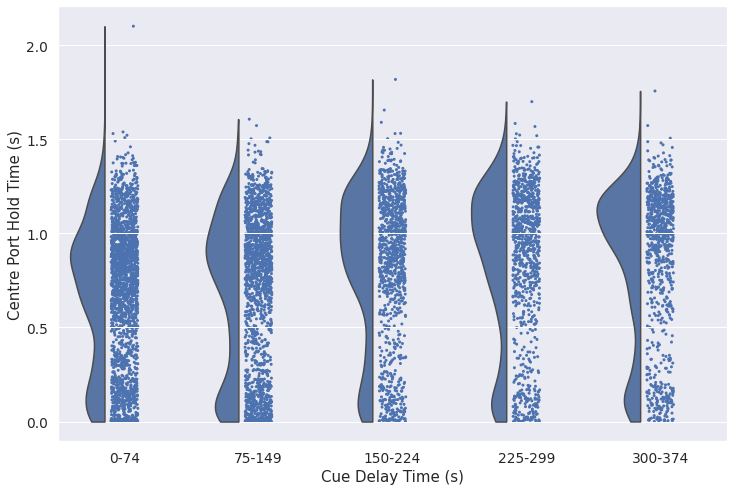

In [17]:
sns.set_theme(font_scale = 1.25)
f, ax = plt.subplots(figsize=(12, 8))
#ax.set(xlabel='Cue Delay Time (s)', ylabel='Centre Port Hold Time (s)')
ax=pt.half_violinplot( data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .65, inner = None, orient = 'v')
ax=sns.stripplot( data = df, palette = pal, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0, orient = 'v')
#ax.set_xlabel("Cue Delay Time (s)",fontsize=15)
#ax.set_ylabel("Centre Port Hold Time (s)",fontsize=15)
#ax.set_xticklabels(df_all_CPHT_by_CueDelay.columns, fontsize =15)
#ax.set_yticklabels(fontsize =15)

plt.savefig('/home/mwisdom/Documents/data_analysis/analysed_data/One_Second_Hold/figures/' + 'rainplot_CueDelay_vs_CentrePortHold_SNL_photo36_38_39_40')


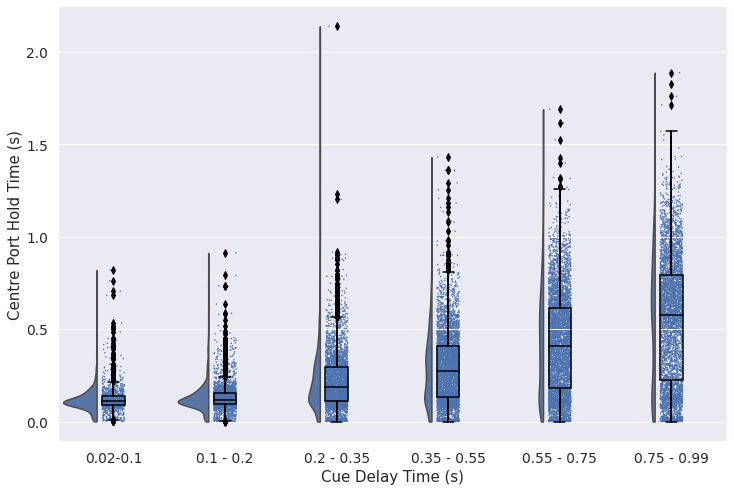

In [26]:
f, ax = plt.subplots(figsize=(12, 8))
ax=pt.half_violinplot(data = df, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = 'v')
ax=sns.stripplot(data = df, palette = pal, edgecolor = "white",
                 size = 1.5, jitter = 1, zorder = 0, orient = 'v')
ax=sns.boxplot(data = df, color = "black", width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 0, orient = 'v')

ax.set_xlabel("Cue Delay Time (s)",fontsize=15)
ax.set_ylabel("Centre Port Hold Time (s)",fontsize=15)
#ax.set_xlabel("Trials post reaching 1s hold",fontsize=15)
#ax.set_ylabel("Centre Port Hold Time (s)",fontsize=15)

#plt.title("Centre port hold times for trials post reaching 1s hold")
#plt.savefig('/home/mwisdom/Documents/figures/one_second_centre_port_hold/CPH01-12/CPH07-12/'  + 'rainplot_CueDelay_vs_CentrePortHold_CPH07_to_12')